## Import Libraries

In [346]:
# Import Libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
import json
import requests
from sklearn import datasets
from geopy.distance import geodesic
from numpy import set_printoptions
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import preprocessing
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor     
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import PolynomialFeatures

## Reading Data

In [305]:
# Fetch and read data
life_data = pd.read_csv('/Volumes/SARALA WORK/Life_Expectancy_Data.csv',low_memory=False)
life_data

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [306]:
life_data.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [307]:
life_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

In [308]:
life_data.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

## Dropping rows with missing values

In [309]:
# Drop rows that has missing values
life_data = life_data.dropna()
life_data.isnull().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

## Statistics of the Data

In [310]:
# Statistics of the data
life_data.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1649.000000,1.649000e+03,1649.000000,1649.000000,1649.000000,1649.000000
mean,2007.840509,69.302304,168.215282,32.553062,4.533196,698.973558,79.217708,2224.494239,38.128623,44.220133,83.564585,5.955925,84.155246,1.983869,5566.031887,1.465363e+07,4.850637,4.907762,0.631551,12.119891
std,4.087711,8.796834,125.310417,120.847190,4.029189,1759.229336,25.604664,10085.802019,19.754249,162.897999,22.450557,2.299385,21.579193,6.032360,11475.900117,7.046039e+07,4.599228,4.653757,0.183089,2.795388
min,2000.000000,44.000000,1.000000,0.000000,0.010000,0.000000,2.000000,0.000000,2.000000,0.000000,3.000000,0.740000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,4.200000
25%,2005.000000,64.400000,77.000000,1.000000,0.810000,37.438577,74.000000,0.000000,19.500000,1.000000,81.000000,4.410000,82.000000,0.100000,462.149650,1.918970e+05,1.600000,1.700000,0.509000,10.300000
50%,2008.000000,71.700000,148.000000,3.000000,3.790000,145.102253,89.000000,15.000000,43.700000,4.000000,93.000000,5.840000,92.000000,0.100000,1592.572182,1.419631e+06,3.000000,3.200000,0.673000,12.300000
75%,2011.000000,75.000000,227.000000,22.000000,7.340000,509.389994,96.000000,373.000000,55.800000,29.000000,97.000000,7.470000,97.000000,0.700000,4718.512910,7.658972e+06,7.100000,7.100000,0.751000,14.000000
max,2015.000000,89.000000,723.000000,1600.000000,17.870000,18961.348600,99.000000,131441.000000,77.100000,2100.000000,99.000000,14.390000,99.000000,50.600000,119172.741800,1.293859e+09,27.200000,28.200000,0.936000,20.700000


In [311]:
# Show that data has 1649 rows and 22 columns
life_data.shape

(1649, 22)

## Exploratory Data Analysis of Features and Data

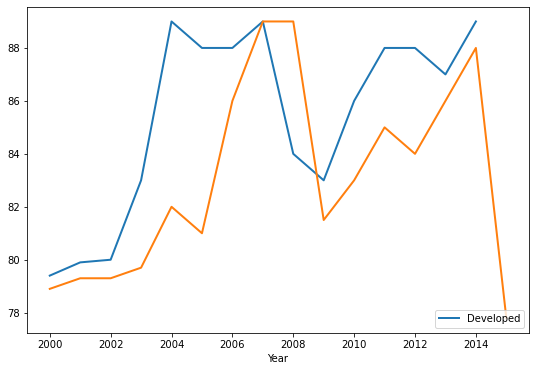

In [312]:
# Show life expectancy comparing developed and developing status
Developed = life_data[life_data['Status']=='Developed']
Developing = life_data[life_data['Status']=='Developing']
developed_plot= Developed.groupby(['Year'])['Life expectancy '].max()
developing_plot = Developing.groupby(['Year'])['Life expectancy '].max()
life_data_developed = developed_plot.plot(linewidth=2,figsize=(9,6))
life_data_developing = developing_plot.plot(linewidth=2,figsize=(9,6))
life_data_developing.legend(['Developed'],loc=4)

Text(0, 0.5, 'Life expectancy')

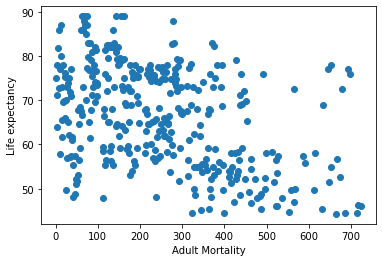

In [313]:
# Show life expectancy compare with Adult mortality
plt.scatter(life_data['Adult Mortality'].unique(),life_data.groupby('Adult Mortality')['Life expectancy '].max())
plt.xlabel('Adult Mortality')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

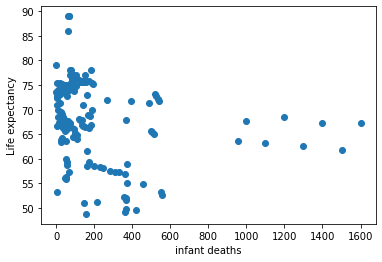

In [314]:
# Show life expectancy compare with infant deaths
plt.scatter(life_data['infant deaths'].unique(),life_data.groupby('infant deaths')['Life expectancy '].max())
plt.xlabel('infant deaths')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

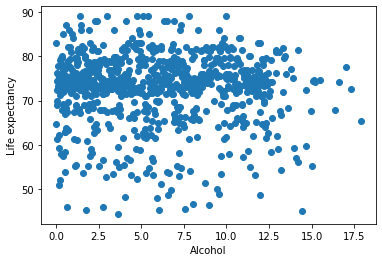

In [315]:
# Show life expectancy compare with Alcohol
plt.scatter(life_data['Alcohol'].unique(),life_data.groupby('Alcohol')['Life expectancy '].max())
plt.xlabel('Alcohol')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

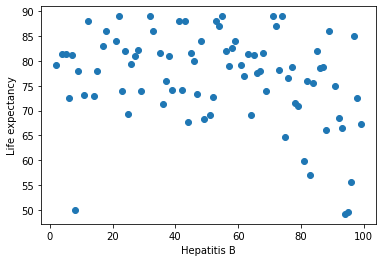

In [316]:
# Show life expectancy compare with Hepatitis B	
plt.scatter(life_data['Hepatitis B'].unique(),life_data.groupby('Hepatitis B')['Life expectancy '].max())
plt.xlabel('Hepatitis B')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

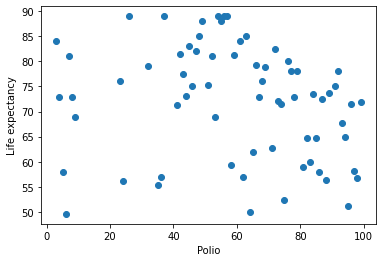

In [317]:
# Show life expectancy compare with Polio
plt.scatter(life_data['Polio'].unique(),life_data.groupby('Polio')['Life expectancy '].max())
plt.xlabel('Polio')
plt.ylabel('Life expectancy')

Text(0, 0.5, 'Life expectancy')

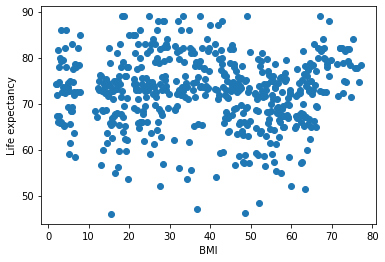

In [318]:
# Show life expectancy compare with BMI
plt.scatter(life_data[' BMI '].unique(),life_data.groupby(' BMI ')['Life expectancy '].max())
plt.xlabel(' BMI ')
plt.ylabel('Life expectancy')

<AxesSubplot:xlabel='Life expectancy ', ylabel='Count'>

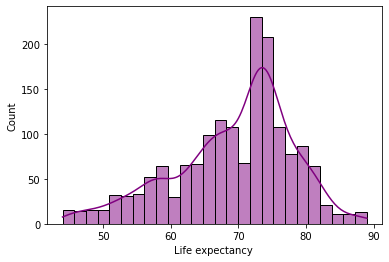

In [319]:
# Show distribution of life expectancy
sns.histplot(life_data['Life expectancy '].dropna(),kde=True,color='purple')

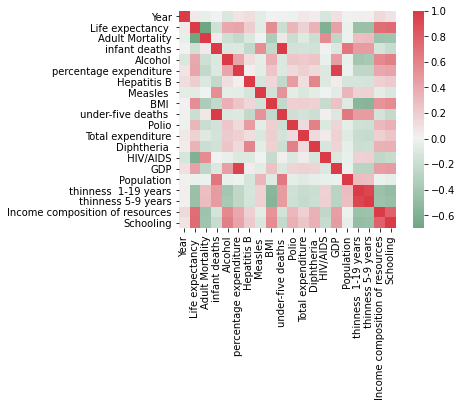

In [320]:
# Show correlation matrix
cmap = sns.diverging_palette(500,10, as_cmap=True)
sns.heatmap(life_data.corr(),cmap=cmap, center=0, annot=False, square=True);

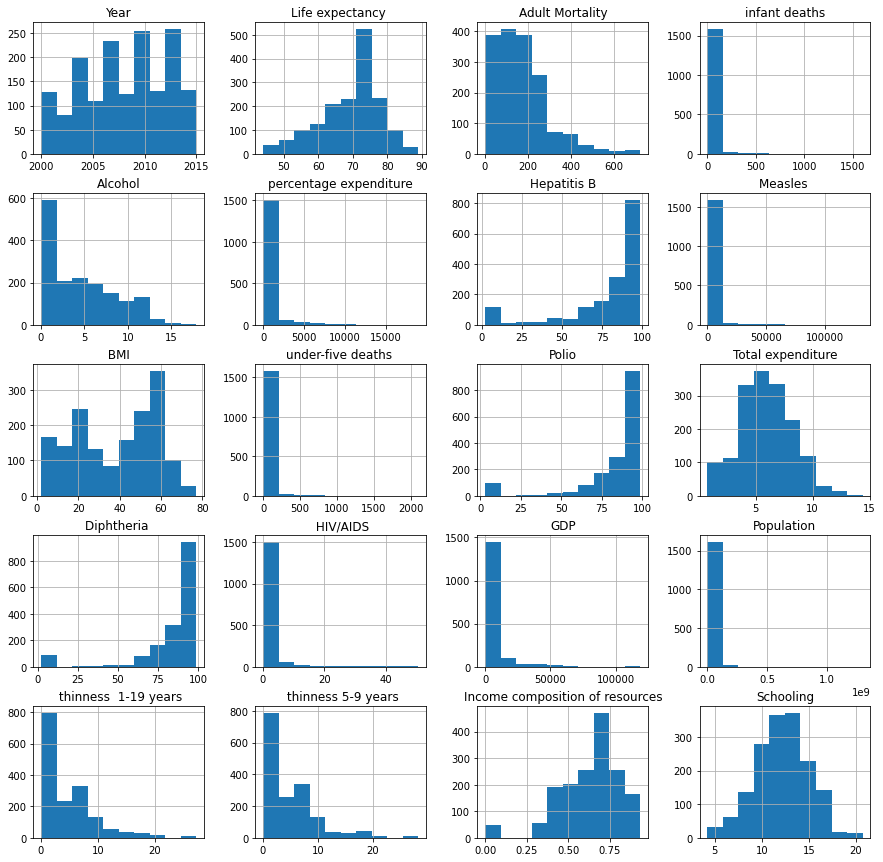

In [321]:
# Show histogram plots for all features
life_data.hist(figsize = (15,15))
plt.show()

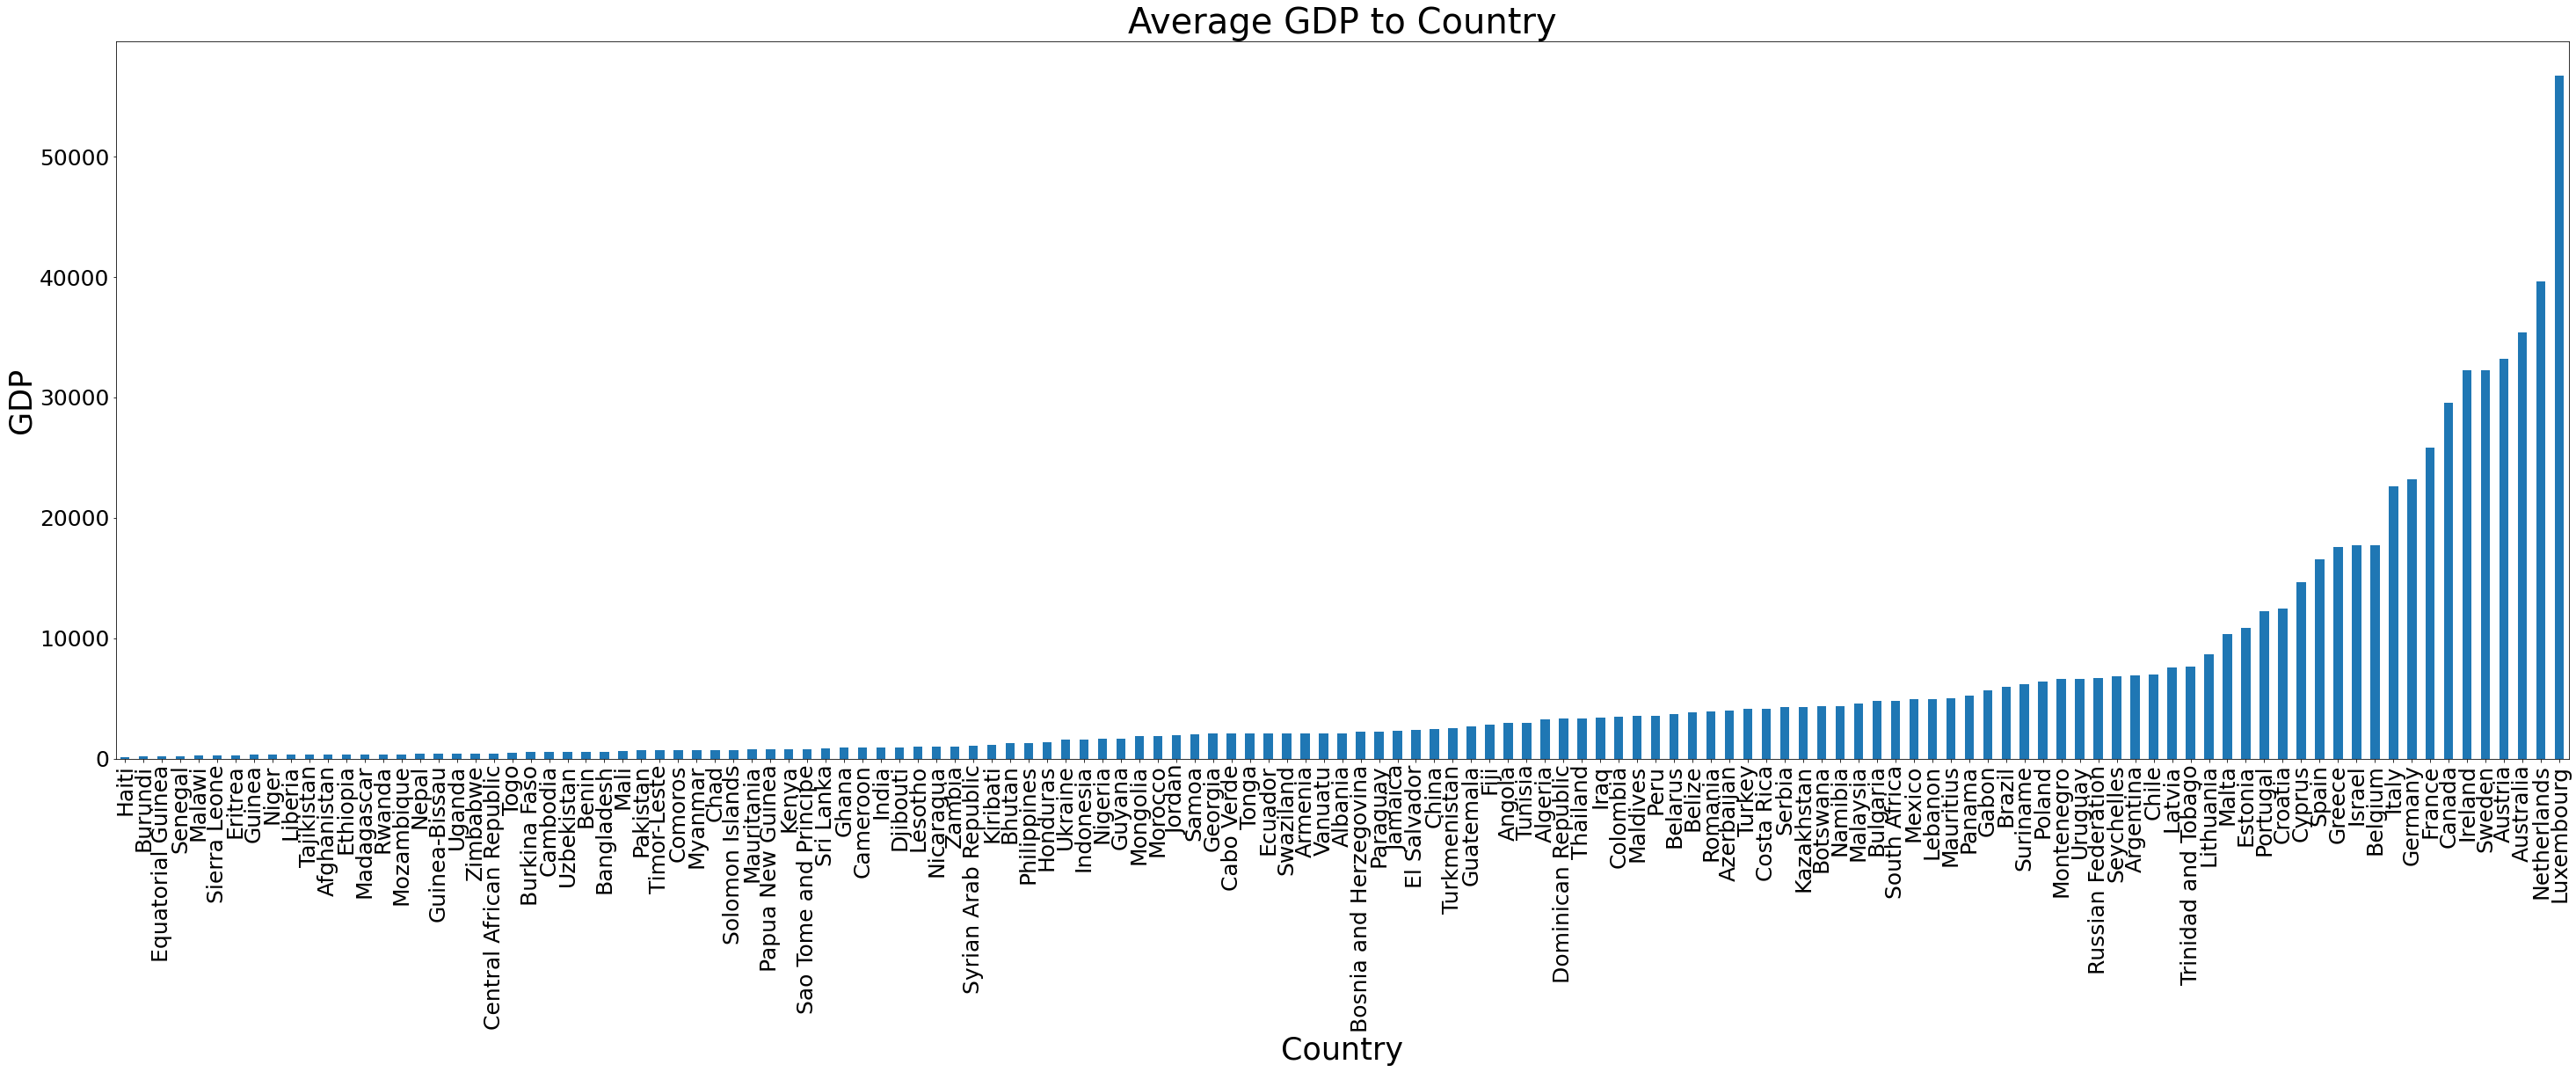

In [322]:
# Show plot graph for Average GDP to country
plot_GDP = life_data.groupby('Country')['GDP'].mean().sort_values(ascending=True)
plot_GDP.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title('Average GDP to Country',fontsize=40)
plt.xlabel('Country',fontsize=35)
plt.ylabel('GDP',fontsize=35)
plt.show()

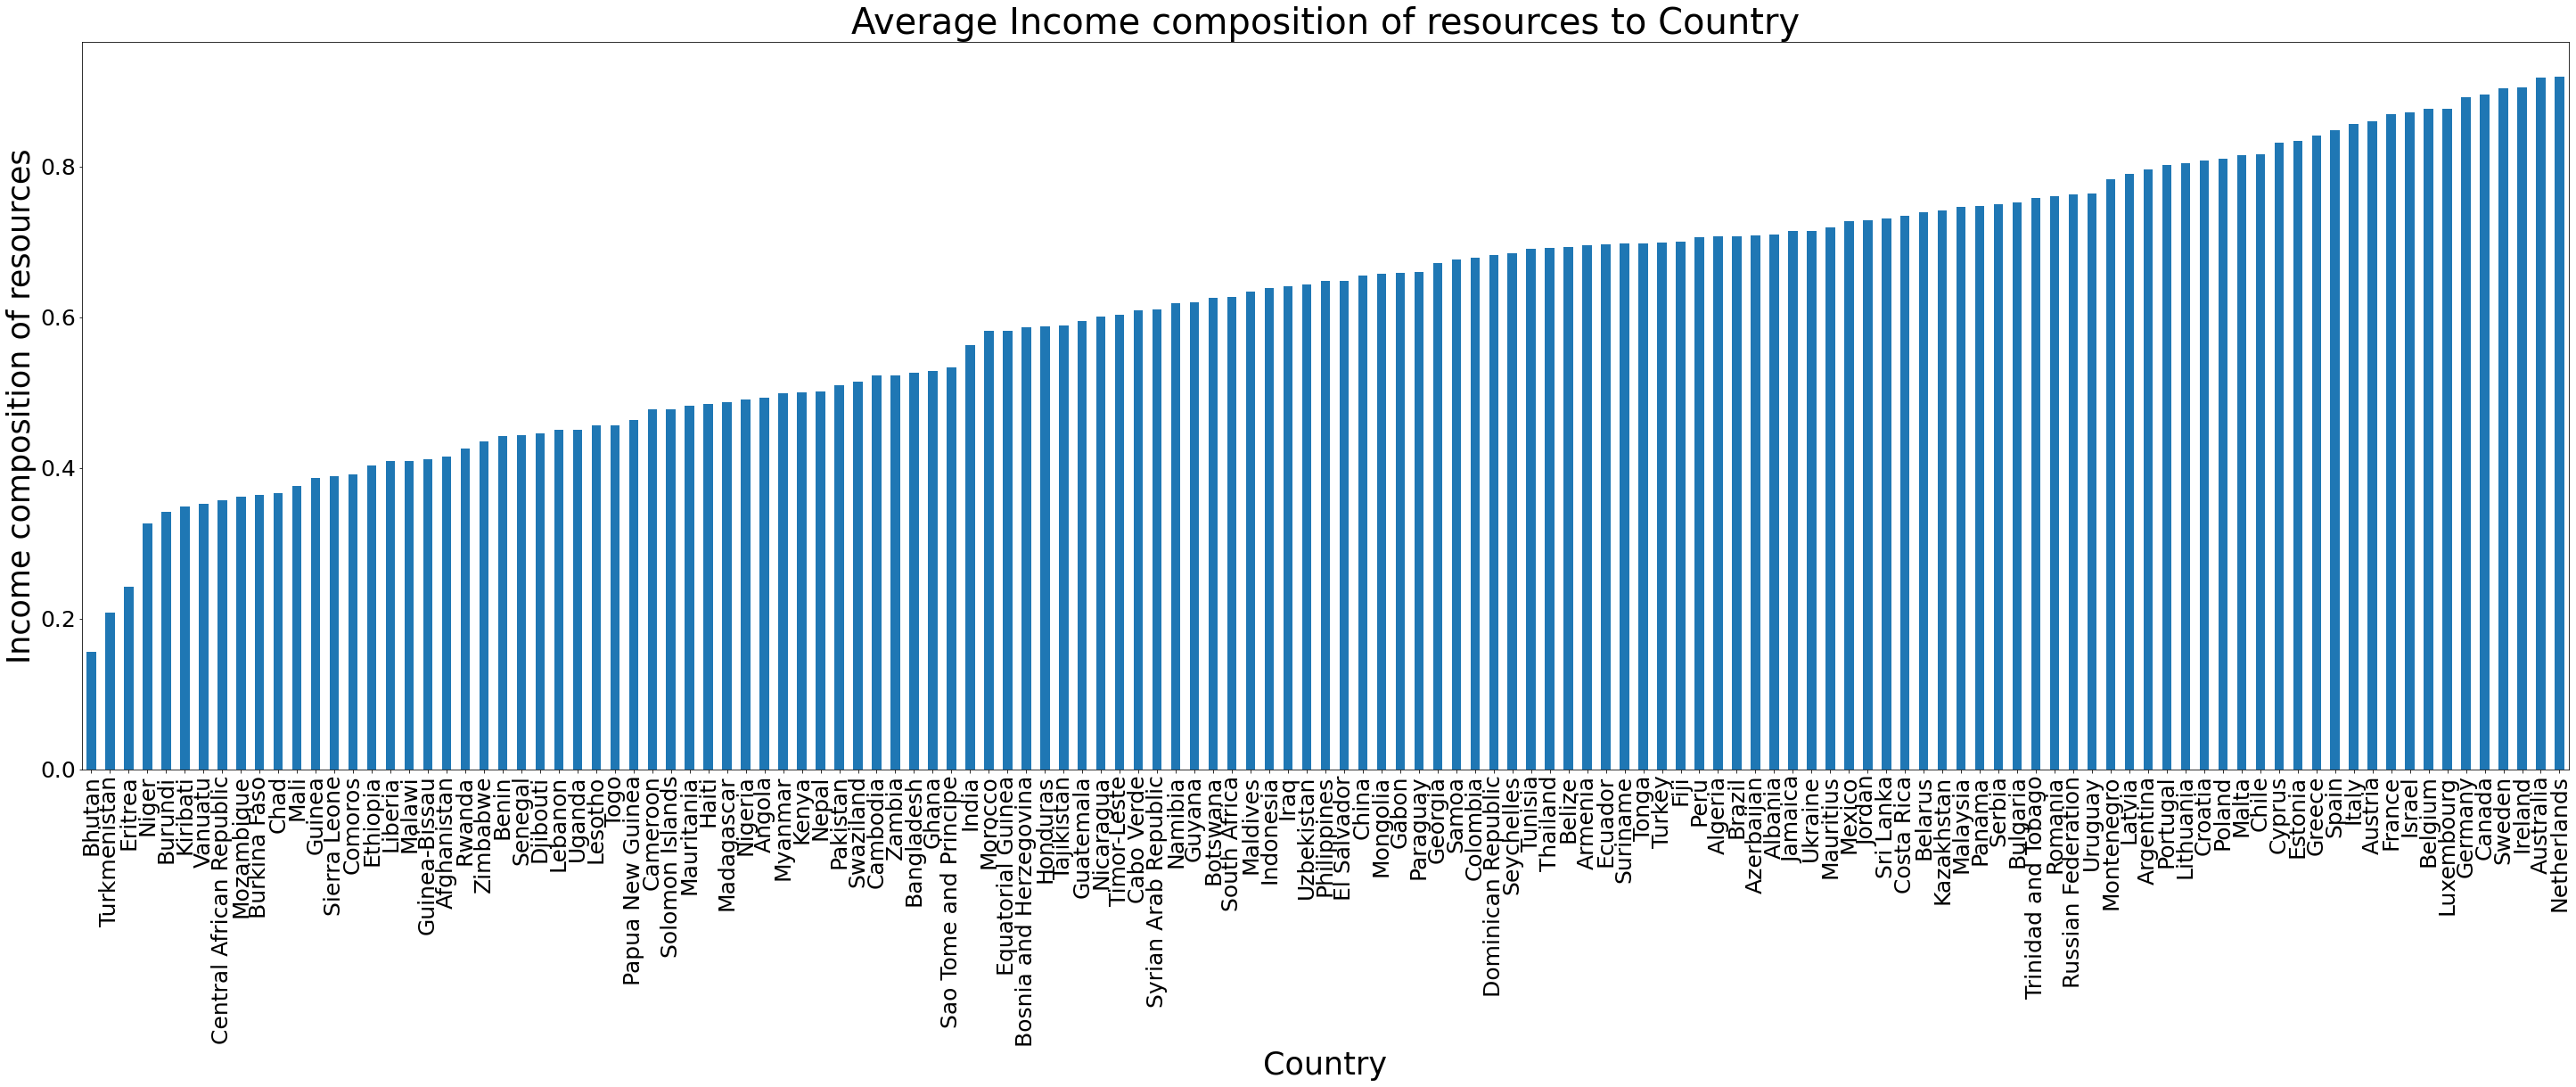

In [323]:
# Show plot graph for Average income composition of resources to country
plot_GDP = life_data.groupby('Country')['Income composition of resources'].mean().sort_values(ascending=True)
plot_GDP.plot(kind='bar', figsize=(50,15), fontsize=25)
plt.title('Average Income composition of resources to Country',fontsize=40)
plt.xlabel('Country',fontsize=35)
plt.ylabel('Income composition of resources',fontsize=35)
plt.show()

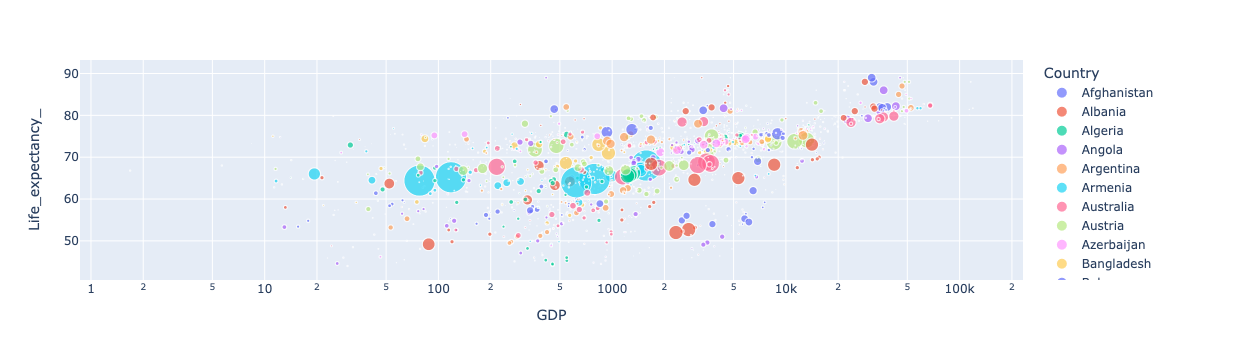

In [326]:
# Show plotly bubble chart of GDP for each country to life expectancy
fig = px.scatter(to_bubble, x='GDP', y='Life_expectancy_',
                 size='Population', color='Country',
                 hover_name='Country', log_x=True, size_max=40)
fig.show()

## Label Encoding and Normalising Data

In [327]:
# Use label encoding and normalising
life_data['Status'] = LabelEncoder().fit_transform(life_data['Status'])
life_data['Status']

/var/folders/3r/d916l93908dbvzp6xq6sccw40000gn/T/ipykernel_57560/3709603583.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



0       1
1       1
2       1
3       1
4       1
       ..
2933    1
2934    1
2935    1
2936    1
2937    1
Name: Status, Length: 1649, dtype: int64

In [328]:
for col in life_data.columns:
    if col not in ('Country', 'Status', 'Year'):
        life_data[col] = life_data[col] / life_data[col].max()
life_data

/var/folders/3r/d916l93908dbvzp6xq6sccw40000gn/T/ipykernel_57560/2644721954.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,1,0.730337,0.363762,0.038750,0.000560,0.003759,0.656566,0.008780,...,0.060606,0.567060,0.656566,0.001976,0.004903,0.026074,0.632353,0.613475,0.511752,0.487923
1,Afghanistan,2014,1,0.673034,0.374827,0.040000,0.000560,0.003878,0.626263,0.003743,...,0.585859,0.568450,0.626263,0.001976,0.005141,0.000253,0.643382,0.620567,0.508547,0.483092
2,Afghanistan,2013,1,0.673034,0.370678,0.041250,0.000560,0.003861,0.646465,0.003271,...,0.626263,0.564976,0.646465,0.001976,0.005301,0.024525,0.650735,0.627660,0.502137,0.478261
3,Afghanistan,2012,1,0.668539,0.376210,0.043125,0.000560,0.004123,0.676768,0.021203,...,0.676768,0.592078,0.676768,0.001976,0.005622,0.002857,0.658088,0.638298,0.494658,0.473430
4,Afghanistan,2011,1,0.665169,0.380360,0.044375,0.000560,0.000374,0.686869,0.022923,...,0.686869,0.546908,0.686869,0.001976,0.000533,0.002302,0.669118,0.645390,0.485043,0.458937
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,1,0.497753,1.000000,0.016875,0.243984,0.000000,0.686869,0.000236,...,0.676768,0.495483,0.656566,0.664032,0.003813,0.009876,0.345588,0.333333,0.434829,0.444444
2934,Zimbabwe,2003,1,0.500000,0.988935,0.016250,0.227196,0.000000,0.070707,0.007593,...,0.070707,0.453092,0.686869,0.725296,0.003804,0.009765,0.360294,0.351064,0.446581,0.458937
2935,Zimbabwe,2002,1,0.503371,0.100968,0.015625,0.247902,0.000000,0.737374,0.002313,...,0.737374,0.453787,0.717172,0.786561,0.000481,0.000097,0.044118,0.046099,0.456197,0.483092
2936,Zimbabwe,2001,1,0.508989,0.948824,0.015625,0.096251,0.000000,0.767677,0.004025,...,0.767677,0.428075,0.757576,0.832016,0.004603,0.009558,0.058824,0.060284,0.456197,0.473430


<AxesSubplot:xlabel='Schooling', ylabel='Life expectancy '>

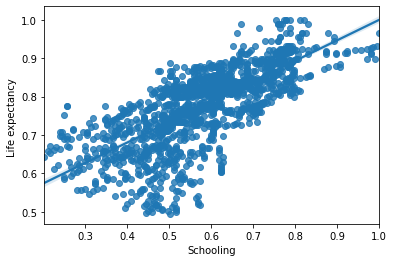

In [329]:
# To show regression plot schooling with life expectancy
sns.regplot(x='Schooling',y='Life expectancy ',data = life_data)

## Application of Machine Learning models

In [330]:
# Using linear regression to predict life expectancy
target = life_data['Life expectancy ']
features = life_data[life_data.columns.difference(['Life expectancy ', 'Year'])]
x_train, x_test, y_train, y_test = train_test_split(pd.get_dummies(features), target, test_size=0.3)
lr = LinearRegression()
lr.fit(x_train, y_train)
lr_coefficient = lr.score(x_test, y_test)
lr_coefficient

0.9573418330481692

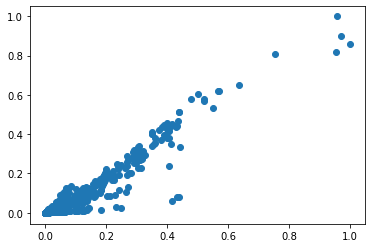

Mean Absolute Error:  0.006306410534815182
Mean Squared Error:  3.977081383362791e-05
Root Mean Squared Error:  0.006306410534815182


In [332]:
lr = LinearRegression()
x = life_data.GDP.values.reshape(-1,1)
y = life_data['percentage expenditure'].values.reshape(-1,1)          

lr.fit(x,y)
x_array = np.arange(min(life_data.GDP),max(life_data.GDP)).reshape(-1,1)  

plt.scatter(x,y)
y_head = lr.predict(x_array)                             
plt.plot(x_array,y_head,color="orange")
plt.show()

from sklearn import metrics
print("Mean Absolute Error: ", metrics.mean_absolute_error(x_array,y_head))
print("Mean Squared Error: ", metrics.mean_squared_error(x_array,y_head))
print("Root Mean Squared Error: ", np.sqrt(metrics.mean_squared_error(x_array, y_head)))

In [334]:
# Using Polynomial regression model
lr = LinearRegression()
x = life_data.GDP.values.reshape(-1,1)
y = life_data['percentage expenditure'].values.reshape(-1,1)          

lr.fit(x,y)

LinearRegression()

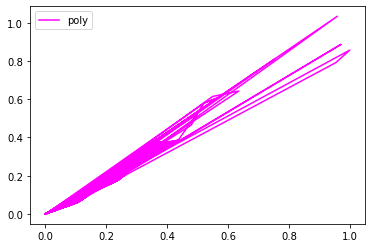

In [335]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)
polynomial_regression = PolynomialFeatures(degree = 15)    
x_polynomial = polynomial_regression.fit_transform(x)

lr2 = LinearRegression()
lr2.fit(x_polynomial,y)

y_head = lr2.predict(x_polynomial)

plt.plot(x,y_head,color="magenta",label="poly")
plt.legend()
plt.show()

In [336]:
pF = PolynomialFeatures(degree = 8)                    

level_poly = pF.fit_transform(x_train)                 

lr3 = LinearRegression()                                     
lr3.fit(level_poly,y_train)

LinearRegression()

r2 value:  0.9464251053048952


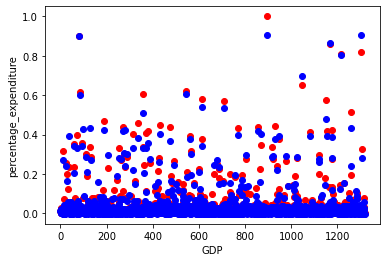

In [337]:
# Show the r2 value
y_head = lr3.predict(pF.fit_transform(x_train))
y_test =np.array(range(0,len(y_train)))
r2 = r2_score(y_train, y_head)
print("r2 value: ", r2)                               


plt.scatter(y_test, y_train, color="red")
plt.scatter(y_test, y_head, color = "blue")
plt.xlabel("GDP")
plt.ylabel("percentage_expenditure")
plt.show()

In [340]:
# Using decision tree model
x = life_data.GDP.values.reshape(-1,1)
y = life_data['percentage expenditure'].values.reshape(-1,1)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state= 42)

In [341]:
dtr = DecisionTreeRegressor()           
dtr.fit(x_train,y_train)                

print(dtr.predict([[1000]]))    

[0.85727879]


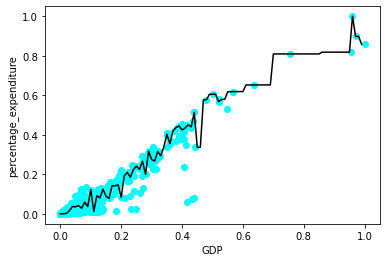

In [342]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   
y_head = dtr.predict(x_array)                        

plt.scatter(x,y, color="cyan")
plt.plot(x_array,y_head,color="black")
plt.xlabel("GDP")
plt.ylabel("percentage_expenditure")
plt.show()

In [344]:
# Using random forest model
x = life_data.GDP.values.reshape(-1,1)
y = life_data['percentage expenditure'].values.reshape(-1,1)
rf= RandomForestRegressor(n_estimators=100, random_state=42)          
rf.fit(x,y)   
print(rf.predict([[1000]]))            

[0.87997292]


/var/folders/3r/d916l93908dbvzp6xq6sccw40000gn/T/ipykernel_57560/1814090957.py:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



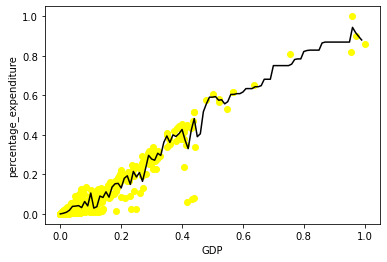

In [345]:
x_array = np.arange(min(x),max(x),0.01).reshape(-1,1)   
y_head = rf.predict(x_array)                        

plt.scatter(x,y, color="yellow")
plt.plot(x_array,y_head,color="black")
plt.xlabel("GDP")
plt.ylabel("percentage_expenditure")
plt.show()